<a href="https://colab.research.google.com/github/NicolasToncheis/Manufatura/blob/main/Animar_Prensa-Joelho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

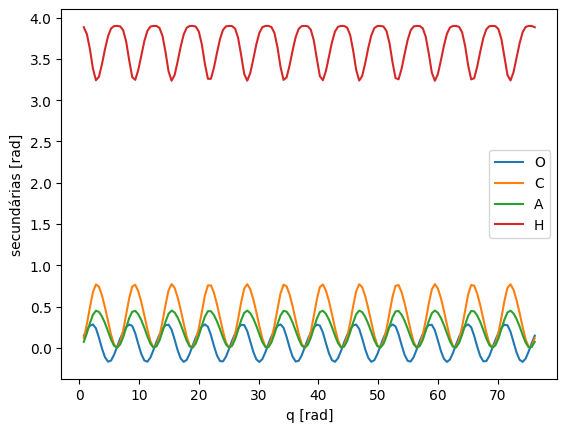

In [ ]:
import numpy as np
from numpy import sin, cos, pi, tan
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from matplotlib import rc # colab
from IPython.display import HTML # colab

def equ_circuito(V, q):
  O = V[0]
  C = V[1]
  A = V[2]
  H = V[3]
  f = np.empty(4)
  f[0] = -R*cos(q) - T*cos(O) - B1*sin(C) + X
  f[1] = -R*sin(q) + T*sin(O) + B1*cos(C) - Y
  f[2] =  B1*sin(C) - B2*sin(A)
  f[3] = -B2*cos(A) - B1*cos(C) + H
  return f

X = 3.0
Y = 1.5
R = .5
B1 = 1.5
B2 = 2.4
T = 2.5

V0 = np.array([pi/10, pi/9, pi/18, 39])

n = 150
q = np.linspace(pi/4,24*pi+pi/4,n)
Vi = np.empty([n,4])

for k in range(n):
  Vi[k,:] = fsolve(equ_circuito,V0,q[k])
  V0 = Vi[k,:]

plt.plot(q,Vi[:,0],
         q,Vi[:,1],
         q,Vi[:,2],
         q,Vi[:,3])
plt.xlabel('q [rad]')
plt.ylabel('secundárias [rad]')
plt.legend(['O','C','A','H'])
plt.show()

(-3.1749996526908433,
 0.6749927065077119,
 -2.5449996494906277,
 0.6449927063553207)

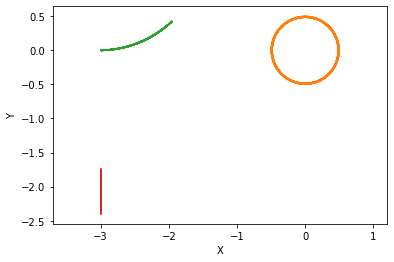

In [ ]:
def ponto_int(q,V):
  O = V[0]
  C = V[1]
  A = V[2]
  H = V[3]
  x = np.empty(4)
  y = np.empty(4)
  # ponto 1:
  x[0] = 0
  y[0] = 0
  # ponto 2:
  x[1] = - R*cos(q)
  y[1] = - R*sin(q)
  # ponto 3:
  x[2] = -X + B1*sin(C)
  y[2] = Y - B1*cos(C)
  # ponto 4:
  x[3] = -X
  y[3] = -H + Y


  return x, y

xint = np.empty([n,4])
yint = np.empty([n,4])

# Calcula os pontos de interesse para cada valor de q
for k in range(n):
  xint[k,:], yint[k,:] = ponto_int(q[k],Vi[k,:])

for j in range(4):
  plt.plot(xint[:,j], yint[:,j])

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')

In [ ]:
# Cria figura:
fig, ax = plt.subplots()
plt.close() # colab

# Cria os pontos de interesse no gráfico:
p = []
for j in range(4):
  p.append(ax.scatter([], []))

# Deixa os eixos com a mesma escala:
ax.axis('equal')

# Define os limites do gráfico:
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

def update1(j):
	# Atualiza a posição dos pontos:
  for k in range(4):
    p[k].set_offsets([xint[j,k], yint[j,k]])
  return p

# Executa a animação:
ani = FuncAnimation(fig, update1, frames = np.arange(n),
                    blit=True, interval = 50)

# Abre janela com a animação no Colab:
rc('animation', html='jshtml') # colab
ani # colab

In [ ]:
# Cria figura:
fig, ax = plt.subplots()
plt.close() # colab

# Cria os pontos de interesse no gráfico:
p = []
for j in range(4):
  p.append(ax.scatter([], []))

# Cria as linhas que ligam os pontos:
lin = []
for j in range(3):
  c,  = ax.plot([], [])
  lin.append(c)

# Deixa os eixos com a mesma escala:
ax.axis('equal')

# Define os limites do gráfico:
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

def update2(j):
	# Atualiza a posição dos pontos:
  for k in range(4):
    p[k].set_offsets([xint[j,k], yint[j,k]])

	# Atualiza a posição das linhas:
  for k in range(3):
    px = [xint[j,k], xint[j,k+1]]
    py = [yint[j,k], yint[j,k+1]]
    lin[k].set_data(px, py)

  return p + lin

# Executa a animação:
ani = FuncAnimation(fig, update2, frames = np.arange(n),
                    blit=True, interval = 50)

# Abre janela com a animação no Colab:
rc('animation', html='jshtml') # colab
ani # colab
